In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import ast

In [39]:
data = pd.read_csv('./labeled_data_Zhan.csv') #Replace with your csv file 
data.head()

file_name character  order  \
0  CMC_CCM_2018_01_31_00_50_41_5586082096C.png         5      1   
1  CMC_CCM_2018_01_31_00_50_41_5586082096C.png         5      2   
2  CMC_CCM_2018_01_31_00_50_41_5586082096C.png         8      3   
3  CMC_CCM_2018_01_31_00_50_41_5586082096C.png         6      4   
4  CMC_CCM_2018_01_31_00_50_41_5586082096C.png         0      5   

           top_left      bottom_right  
0  (1210.0, 1169.0)  (1299.0, 1228.0)  
1  (1207.0, 1113.0)  (1300.0, 1168.0)  
2  (1206.0, 1064.0)  (1298.0, 1116.0)  
3  (1202.0, 1021.0)  (1299.0, 1070.0)  
4   (1204.0, 980.0)  (1296.0, 1033.0)

## One image per line

We transform the csv file to have one image per line and for each line we have information about the 11 characters.

In [40]:
transformed_df = pd.DataFrame()
# Group by 'file_name' and then iterate over each group
for file_name, group in data.groupby('file_name'):
    # Create a new entry for the file
    new_entry = {'file_name': file_name}
    
    # Iterate over each row in the group to populate the new entry
    for _, row in group.iterrows():
        order = int(row['order'])
        # Update the new entry with character, top_left, and bottom_right information
        new_entry[f'character {order}'] = row['character']
        new_entry[f'top_left {order}'] = row['top_left']
        new_entry[f'bottom_right {order}'] = row['bottom_right']

    transformed_df = transformed_df.append(new_entry, ignore_index=True)

/var/folders/zh/hpr168d168lfz3k0mwcn9dsr0000gn/T/ipykernel_35133/3311321885.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transformed_df = transformed_df.append(new_entry, ignore_index=True)
/var/folders/zh/hpr168d168lfz3k0mwcn9dsr0000gn/T/ipykernel_35133/3311321885.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transformed_df = transformed_df.append(new_entry, ignore_index=True)
/var/folders/zh/hpr168d168lfz3k0mwcn9dsr0000gn/T/ipykernel_35133/3311321885.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transformed_df = transformed_df.append(new_entry, ignore_index=True)
/var/folders/zh/hpr168d168lfz3k0mwcn9dsr0000gn/T/ipykernel_35133/3311321885.py:15: FutureWarning: The frame.append method is deprecated and

In [41]:
transformed_df.head()

file_name character 1      top_left 1  \
0  CMC_CCM_2018_01_31_00_29_01_55860830682.png           5  (851.0, 781.0)   
1  CMC_CCM_2018_01_31_00_30_34_558608206EX.png           5  (845.0, 784.0)   
2  CMC_CCM_2018_01_31_00_31_00_558608606XE.png           5  (848.0, 770.0)   
3  CMC_CCM_2018_01_31_00_31_49_55860810619.png           5  (833.0, 779.0)   
4  CMC_CCM_2018_01_31_00_32_15_558608407X0.png           5  (824.0, 773.0)   

   bottom_right 1 character 2      top_left 2  bottom_right 2 character 3  \
0  (909.0, 817.0)           5  (854.0, 744.0)  (909.0, 782.0)           8   
1  (902.0, 817.0)           5  (845.0, 746.0)  (902.0, 784.0)           8   
2  (909.0, 802.0)           5  (849.0, 735.0)  (907.0, 770.0)           8   
3  (892.0, 815.0)           5  (834.0, 743.0)  (891.0, 779.0)           8   
4  (886.0, 811.0)           5  (826.0, 738.0)  (886.0, 773.0)           8   

       top_left 3  bottom_right 3  ...  bottom_right 8 character 9  \
0  (852.0, 708.0)  (908.0, 743.0)  ...  (910.0, 548.0)           6   
1  (844.0, 709.0)  (899.0, 746.0)  ...  (898.0, 551.0)           6   
2  (848.0, 699.0)  (904.0, 736.0)  ...  (900.0, 540.0)           6   
3  (835.0, 709.0)  (890.0, 741.0)  ...  (889.0, 543.0)           6   
4  (823.0, 704.0)  (883.0, 740.0)  ...  (887.0, 542.0)           7   

       top_left 9  bottom_right 9 character 10     top_left 10  \
0  (858.0, 474.0)  (911.0, 511.0)            8  (857.0, 445.0)   
1  (844.0, 478.0)  (895.0, 512.0)            E  (844.0, 445.0)   
2  (848.0, 463.0)  (902.0, 500.0)            X  (847.0, 434.0)   
3  (832.0, 472.0)  (888.0, 509.0)            1  (833.0, 447.0)   
4  (825.0, 469.0)  (885.0, 511.0)            X  (826.0, 434.0)   

  bottom_right 10 character 11     top_left 11 bottom_right 11  
0  (912.0, 473.0)            2  (855.0, 417.0)  (908.0, 447.0)  
1  (898.0, 479.0)            X  (839.0, 410.0)  (895.0, 449.0)  
2  (903.0, 461.0)            E  (846.0, 403.0)  (906.0, 438.0)  
3  (889.0, 476.0)            9  (829.0, 403.0)  (888.0, 444.0)  
4  (882.0, 469.0)            0  (826.0, 398.0)  (884.0, 437.0)  

[5 rows x 34 columns]

## Choose which image to plot, by modifying this number to select another image

In [42]:
n = 5

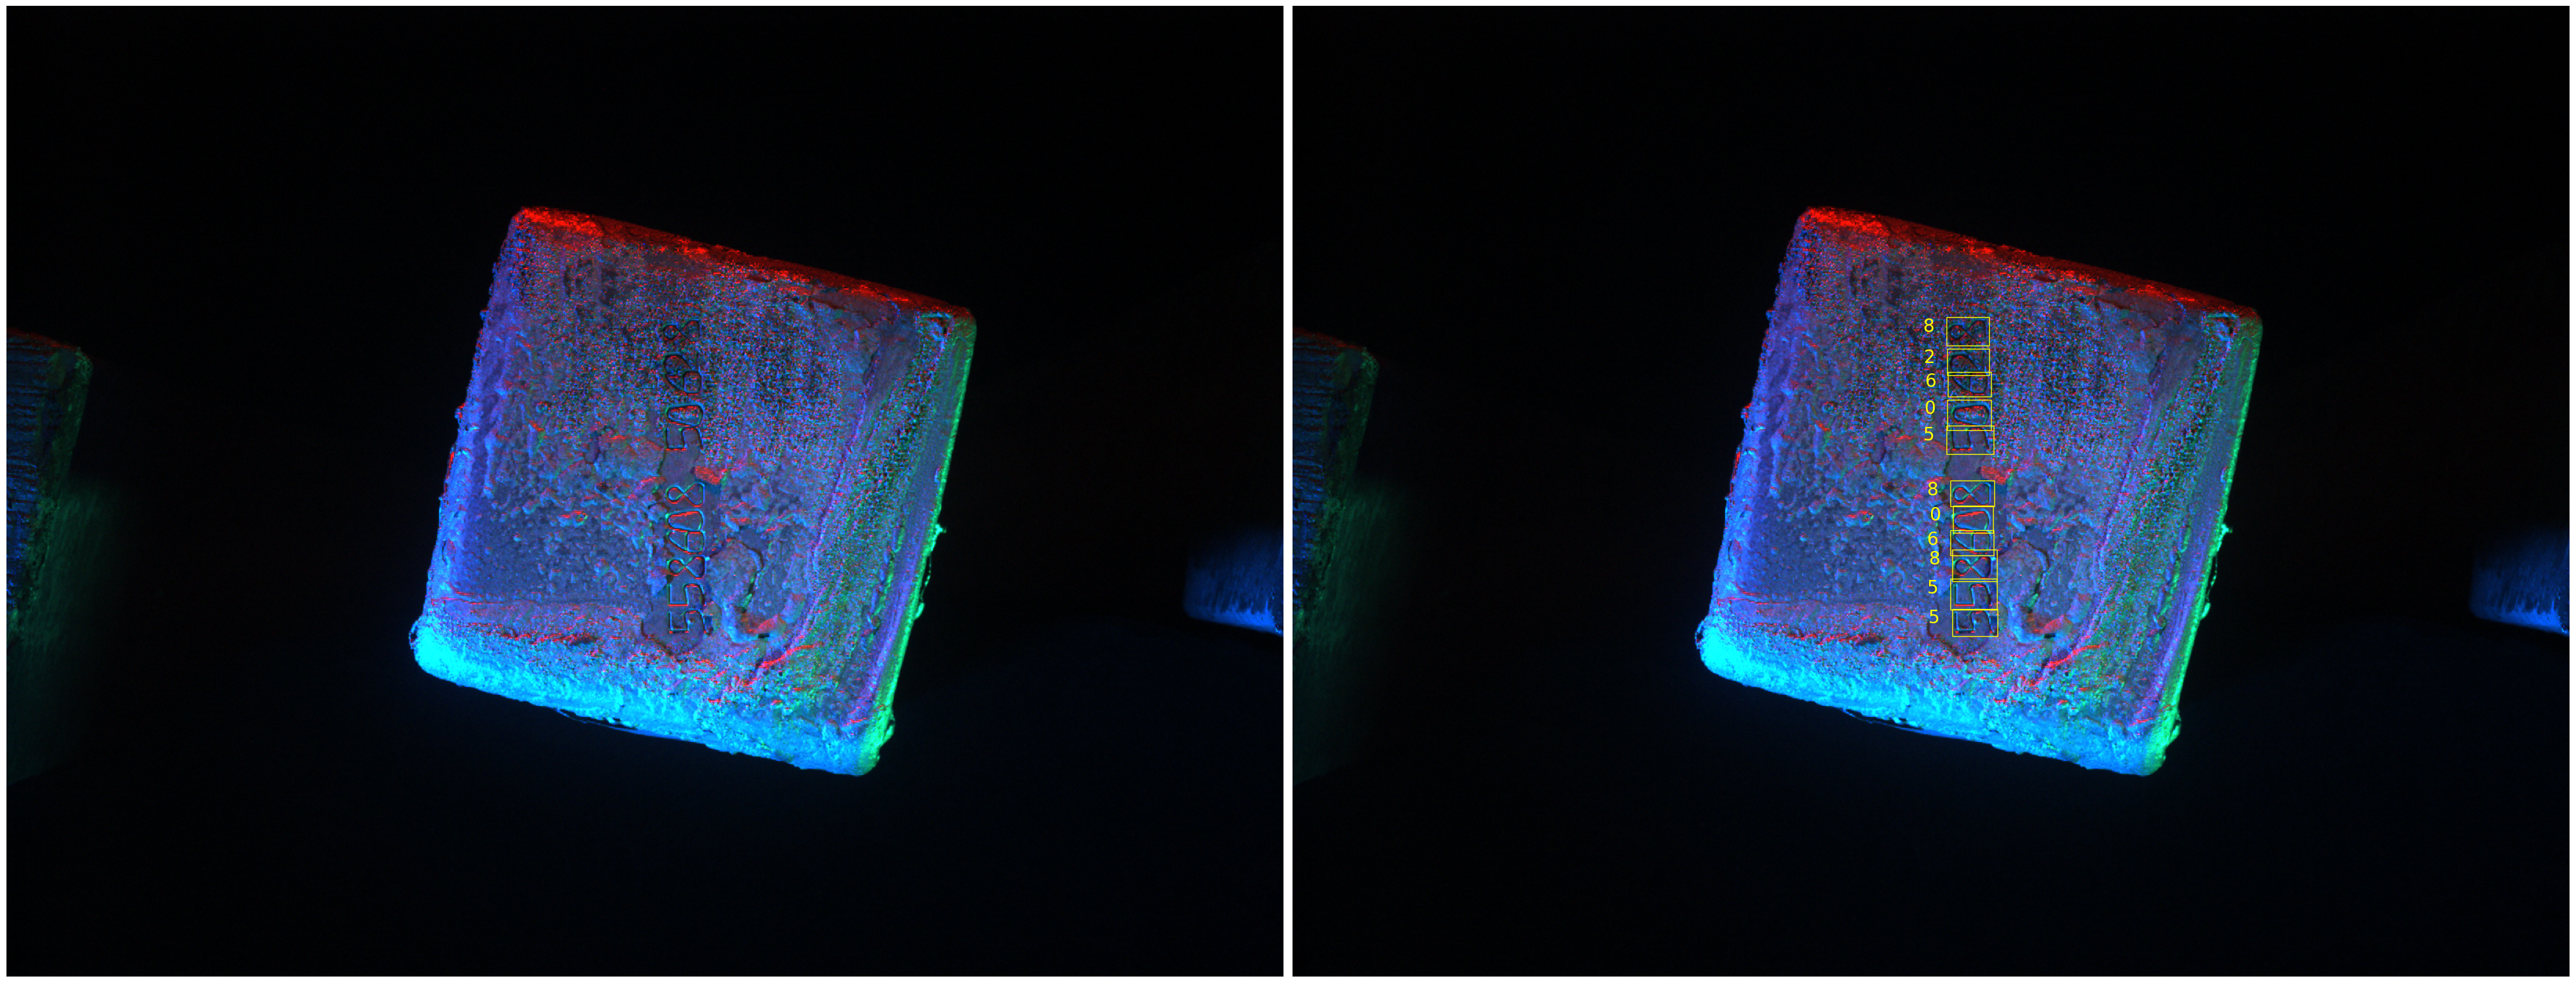

In [43]:
row = transformed_df.iloc[n]

# Open the image file
original_img = Image.open(row['file_name'])

# two subplots: one for the original image and one for the annotated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 30))  

# Display the original image in the first subplot
ax1.imshow(original_img)
ax1.axis('off')

# Display the original image in the second subplot, which will be annotated
ax2.imshow(original_img)

# Draw each character's bounding box and annotate on the second subplot
for i in range(1, 12):  # Adjust the range if there are more or fewer characters
    character_key = f'character {i}'
    top_left_key = f'top_left {i}'
    bottom_right_key = f'bottom_right {i}'

    # Check if the character information is present
    if character_key in row and pd.notna(row[character_key]):
        # Convert the string representation of the tuple back to an actual tuple if necessary
        top_left = ast.literal_eval(row[top_left_key])
        bottom_right = ast.literal_eval(row[bottom_right_key])

        # Perform arithmetic on the coordinates
        width = bottom_right[0] - top_left[0]
        height = bottom_right[1] - top_left[1]

        # Create a Rectangle patch
        rect = patches.Rectangle(top_left, width, height, linewidth=1, edgecolor='yellow', facecolor='none')
        
        # Add the rectangle to the second subplot
        ax2.add_patch(rect)
        
        # Calculate the position for the text annotation to be on the left of the bounding box
        offset = 30  # Modify this value to offset the label from bounding box
        text_x = max(top_left[0] - offset, 0) 
        text_y = top_left[1]

        # Annotate the character with a larger font and yellow color on the second subplot
        ax2.text(text_x, text_y, row[character_key], fontsize=20, color='yellow', verticalalignment='top')

ax2.axis('off')  

# Show the plot with both the original and annotated images
plt.tight_layout()
plt.show()

## Double Click on the image to zoom in